# Explore and Predict Crimes in Chicago 
- Coursework for **BENVGSA6: Data Science for Spatial Systems**
  * Candidate number: SXWX3
  * Student number: 17053682
  * Date: 22/04/2018
  * Documatation word count: 2162 words
- Kernel: Python 3
- Packages used in this notebook and their version numbers: 
  * numpy: *1.13.1*
  * pandas: *0.20.3*
  * matplotlib: *2.0.2*
  * scikit-learn: *0.19.0*
  
### Table of Contents
* [Introduction](#0-Introduction)
* [Objective](#1-Objective)
* [Data Cleaning](#2-Data-Cleaning)
   * [Data Source](#2.1-Data-Source)
   * [Data Import](#2.2-Data-Import)
   * [Data Cleaning and Manipulation](#2.3-Data-Cleaning-and-Manipulation)
* [Data Analysis](#3-Data-Analysis)
   * [Basic Crime Stats Analysis](#3.1-Basic-Crime-Stats-Analysis)
   * [Analysis of Arrest](#3.2-Analysis-of-Arrest)
   * [Analysis of Crime Type](#3.3-Analysis-of-Crime-Type)
* [Data Classification](#4-Data-Classification)
   * [Predict Arrest](#4.1-Predict-Arrest)
   * [Predict Crime Type](#4.2-Predict-Crime-Type)
* [Conclusion](#5-Conclusion)
* [References](#References)

## 0 Introduction
The overall crime rate in City of Chicago, one of the largest cities in the US, is significantly higher than the national average level<sup>[1]</sup>. Although efforts have been made, criminal activity continues to be the most pressing problem. Therefore, analysing and predicting crime behaviour becomes increasingly essential. Previous studies and projects related to crime prediction provide an exploration of data mining methods including regression, clustering and classification applied in different scenarios.


## 1 Objective
The aim of this project consists of two parts：
* Firstly, analyse and visualise detailed information in crime dataset to yield deep insights into criminal behaviour in Chicago;
* Secondly, use machine learning techniques - Decision Tree and Random Forest respectively to predict arrests and the type of crimes given a series of geographical and time-based features.




## 2 Data Cleaning
### 2.1 Data Source
- Data Owner:  Chicago Police Department
- Link:     [Chicago Data Portal](https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-present/ijzp-q8t2)

### 2.2 Data Import
**Import the basic libraries before start.**

In [1]:
# import numpy, pandas, matplotlib packages 
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt 

# specify number of rows to show
pd.set_option('display.max_rows', 300) 

# specify default number format to 4 decimal places
pd.options.display.float_format = '{:40,.4f}'.format 

# specify that graphs should use ggplot styling
plt.style.use('ggplot') 

# ensure graphs properly display in the notebook
%matplotlib inline

**Import the dataset `'Crimes.csv'` as a dataframe called `'df'`.** Check the header and the first few rows using `.head()`.

In [2]:
# load csv data and set up the 'df' dataframe, set index column to 'Date'
df = pd.read_csv('Crimes.csv', index_col='Date')
 
df.head()

,ID,Case Number,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
Date,,,,,,,,,,,,,,,,,,,,,
09/21/2017 12:15:00 AM,11094370,JA440032,072XX N CALIFORNIA AVE,1122,DECEPTIVE PRACTICE,COUNTERFEIT CHECK,CURRENCY EXCHANGE,True,False,2411,...,50,2,10,"1,156,443.0000","1,947,707.0000",2017,03/01/2018 15:52,42.0123,-87.6997,"(42.012293397, -87.699714109)"
10/12/2017 19:14,11118031,JA470589,055XX W GRAND AVE,1345,CRIMINAL DAMAGE,TO CITY OF CHICAGO PROPERTY,JAIL / LOCK-UP FACILITY,True,False,2515,...,29,19,14,"1,138,788.0000","1,913,480.0000",2017,03/01/2018 15:52,41.9187,-87.7655,"(41.918711651, -87.76551063)"
10/30/2017 11:52:00 AM,11134189,JA491697,043XX S TALMAN AVE,4651,OTHER OFFENSE,SEX OFFENDER: FAIL REG NEW ADD,APARTMENT,True,False,922,...,12,58,26,"1,159,425.0000","1,875,711.0000",2017,03/01/2018 15:52,41.8147,-87.6907,"(41.814669784, -87.690726696)"
09/29/2017 06:45:00 PM,11156462,JA521389,055XX W BELMONT AVE,1110,DECEPTIVE PRACTICE,BOGUS CHECK,CURRENCY EXCHANGE,True,False,2514,...,30,19,11,"1,138,653.0000","1,920,720.0000",2017,03/01/2018 15:52,41.9386,-87.7658,"(41.938581442, -87.765830579)"
12/01/2017 06:20,11164874,JA531910,022XX W CHICAGO AVE,265,CRIM SEXUAL ASSAULT,AGGRAVATED: OTHER,STREET,True,False,1221,...,32,24,2,"1,161,264.0000","1,905,292.0000",2017,03/01/2018 15:52,41.8958,-87.6832,"(41.895805099, -87.683159355)"


**Get an overview of the columns by counting distinct for each variable.**

In [3]:
# Count unique values for each variable
print("There are a total of {:,} values in the dataset.".format(len(df)))

# iterate over 22 variables and print their value counts 
for var, series in df.iteritems():
    print("There are a total of {:,} {}.".format(len(series.value_counts()), var))

There are a total of 266,862 values in the dataset.
There are a total of 266,862 ID.
There are a total of 266,815 Case Number.
There are a total of 27,791 Block.
There are a total of 329 IUCR.
There are a total of 32 Primary Type.
There are a total of 308 Description.
There are a total of 128 Location Description.
There are a total of 2 Arrest.
There are a total of 2 Domestic.
There are a total of 274 Beat.
There are a total of 23 District.
There are a total of 50 Ward.
There are a total of 77 Community Area.
There are a total of 26 FBI Code.
There are a total of 51,050 X Coordinate.
There are a total of 72,607 Y Coordinate.
There are a total of 1 Year.
There are a total of 741 Updated On.
There are a total of 128,994 Latitude.
There are a total of 128,883 Longitude.
There are a total of 129,264 Location.


**Let's have a look of the summary of this imported dataframe using `.info()`** to view the index, counts and types of each column and memory usage. There are totally 21 columns and 266,862 entries in the dataset. We notice that there are some entries without location information. We'll deal with that later.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 266862 entries, 09/21/2017 12:15:00 AM to 12/23/2017 12:00:00 PM
Data columns (total 21 columns):
ID                      266862 non-null int64
Case Number             266862 non-null object
Block                   266862 non-null object
IUCR                    266862 non-null object
Primary Type            266862 non-null object
Description             266862 non-null object
Location Description    265947 non-null object
Arrest                  266862 non-null bool
Domestic                266862 non-null bool
Beat                    266862 non-null int64
District                266861 non-null float64
Ward                    266862 non-null int64
Community Area          266862 non-null int64
FBI Code                266862 non-null object
X Coordinate            265072 non-null float64
Y Coordinate            265072 non-null float64
Year                    266862 non-null int64
Updated On              266862 non-null object
Latitude         

### 2.3 Data Cleaning and Manipulation
The dataset contains some redundant information at present, which is not considered very useful for this project. In this case we will get rid of these columns. **Drop the columns below and save as a new dataframe named `crime`**. 

In [5]:
crime = df.drop(['ID', 'Block', 'Case Number', 'IUCR', 'Description', 'Beat', 'District', 'Ward', 'Year', 'FBI Code', 
                 'X Coordinate', 'Y Coordinate', 'Updated On', 'Latitude', 'Longitude', 'Location'], axis = 1)
crime.head(3)

,Primary Type,Location Description,Arrest,Domestic,Community Area
Date,,,,,
09/21/2017 12:15:00 AM,DECEPTIVE PRACTICE,CURRENCY EXCHANGE,True,False,2
10/12/2017 19:14,CRIMINAL DAMAGE,JAIL / LOCK-UP FACILITY,True,False,19
10/30/2017 11:52:00 AM,OTHER OFFENSE,APARTMENT,True,False,58


Now it contains the following set of features:

  * **Date** - Timestamp when the crime occurred (basic format:YYYY-mm-dd hh:MM:ss). *We can extract more time-based information.* 
  * **Primary Type** - The primary type of crimes. *One of our prediction task target.*
  * **Location Description** - Description of the location where the incident occurred<sup>[2]</sup>.
  * **Arrest** - Indicates whether an arrest was made. *The other target for prediction.*
  * **Domestic** - Indicates whether the crime was domestic-related<sup>[2]</sup>.
  * **Community Area** - Indicates the community area where the crime occurred<sup>[2]</sup>. See [community areas](https://data.cityofchicago.org/d/cauq-8yn6).

**Rename columns `Primary Type`, `Location Description`, and `Community Area`.** Strip out spaces.

In [6]:
crime = crime.rename(columns={'Primary Type': 'PrimaryType', 
                              'Location Description': 'Location',
                              'Community Area': 'CommunityArea'})

Before moving on, remove the null values from the dataframe.

In [7]:
crime = crime.dropna(axis = 0, how = 'any')

### 2.3.1 Parse the Date
Have a check of the data types encoded for each column from the info in last section. The type of the index column *`Date`*  is currently `object`. **Use `.to_datetime()` function to change it to the date format.** 

In [8]:
crime.index = pd.to_datetime(crime.index)

**Verify the change we made by running `.dtypes` on the column again.** The crime data ranges from *01/01/2017 00:00:00* to *31/12/2017 23:58:00*.

In [9]:
# check type of 'Date'
print(crime.index.dtype)

# print the time range of the dataset
print(crime.index.min())
print(crime.index.max())

datetime64[ns]
2017-01-01 00:00:00
2017-12-31 23:58:00


**Parse the `'Date'` variable to prepare for the analysis.** Extract month, day, weekday and hour features and add new columns to the dataframe. 

In [10]:
# extract date and time information from 'Date' variable, add columns to the table
crime['Date'] = crime.index
crime['Month'] = crime['Date'].dt.month
crime['Day'] = crime['Date'].dt.day
crime['Weekday'] = crime['Date'].dt.dayofweek #The day of the week with Monday=0, Sunday=6
crime['Hour'] = crime['Date'].dt.hour

To make use of the datetime information, we can divide one day into two time periods: day and night.

In [11]:
# extract time from Dates and add a new column TimeOfDay representing Day/Night
from datetime import datetime

# create an empty list
TimeOfDay = []

# Day: 6:00AM - 5:59PM, Night: 6:00PM - 5:59AM
start_t = datetime.strptime('06:00', '%H:%M').time()
end_t = datetime.strptime('18:00', '%H:%M').time()

# iterate over the Date index, add Day/Night to the new column
for row in crime['Date']:
    if start_t <= row.time() < end_t:
        TimeOfDay.append('Day')
    else:
        TimeOfDay.append('Night')

# add TimeOfDay as a new column in the dataframe
crime['TimeOfDay'] = TimeOfDay

After parsing the date and time information, we can drop the `Date` column.

In [12]:
# drop the Date column
crime = crime.drop(['Date'], axis = 1)

### 2.3.2 Reduce Dimensionality of Categories  
The community areas in Chicago are 77 divisions of Chicago<sup>[1] </sup>.  As the [map](https://en.wikipedia.org/wiki/Community_areas_in_Chicago) shows, community area is the sub-category of 'Sides'. There are 4 Sides in Chicago - central, north side, west side and south side. 'Central' includes 3 community areas, while 'North Side' covers 23, 'West Side' covers 9 and 'South Side' contains the most - 42. We can group 77 community areas by 'Sides' to reduce dimensions of categories.

In [13]:
# set dictionaries of four 'sides'
central = dict.fromkeys([8, 32, 33], 'Central')
north = dict.fromkeys([5, 6, 7, 21, 22, 1, 2, 3, 4, 9, 10, 11, 12, 13, 14, 76, 77, 
                       15, 16, 17, 18, 19, 20], 'North Side')
west = dict.fromkeys([23, 24, 25, 26, 27, 28, 29, 30, 31], 'West Side')
south = dict.fromkeys([34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 60, 69, 56, 57, 58, 
                       59, 61, 62, 63, 64, 65, 66, 67, 68, 44, 45, 46, 47, 48, 49, 
                       50, 51, 52, 53, 54, 55, 70, 71, 72, 73, 74, 75], 'South Side')

In [14]:
# replace the original values in Community Area column 
crime.CommunityArea = crime.CommunityArea.replace(central, regex=True)
crime.CommunityArea = crime.CommunityArea.replace(north, regex=True)
crime.CommunityArea = crime.CommunityArea.replace(west, regex=True)
crime.CommunityArea = crime.CommunityArea.replace(south, regex=True)

### 2.3.3 Set Data Types
`'Month', 'Day', 'Weekday', 'Hour'` are currently set as integer which are apparently categorical data. In order to avoid being treated as numeric, **their types should be converted from integer to string using `.astype()`**.

In [15]:
crime['Month'] = crime.Month.astype(str)
crime['Day'] = crime.Day.astype(str)
crime['Weekday'] = crime.Weekday.astype(str)
crime['Hour'] = crime.Hour.astype(str)
crime.dtypes

PrimaryType      object
Location         object
Arrest             bool
Domestic           bool
CommunityArea    object
Month            object
Day              object
Weekday          object
Hour             object
TimeOfDay        object
dtype: object

Before starting with analysis, examine the dataframe again.

In [16]:
#Check the updated dataframe
crime.head()

,PrimaryType,Location,Arrest,Domestic,CommunityArea,Month,Day,Weekday,Hour,TimeOfDay
Date,,,,,,,,,,
2017-09-21 00:15:00,DECEPTIVE PRACTICE,CURRENCY EXCHANGE,True,False,North Side,9,21,3,0,Night
2017-10-12 19:14:00,CRIMINAL DAMAGE,JAIL / LOCK-UP FACILITY,True,False,North Side,10,12,3,19,Night
2017-10-30 11:52:00,OTHER OFFENSE,APARTMENT,True,False,South Side,10,30,0,11,Day
2017-09-29 18:45:00,DECEPTIVE PRACTICE,CURRENCY EXCHANGE,True,False,North Side,9,29,4,18,Night
2017-12-01 06:20:00,CRIM SEXUAL ASSAULT,STREET,True,False,West Side,12,1,4,6,Day


## 3 Data Analysis
After cleaning the original dataset, now we can start to explore the features and trends of crimes in Chicago. A preliminary analysis will be performed in this section to provide insights to the interaction among these features. What's more, this step enables us to identify useful variables that can be furtherly selected to build the prediction models.
### 3.1 Basic Crime Stats Visualisation
#### 3.1.1 Total number by month
First, let's look at the crime trends per month. As the line graph clearly shows, the number of crimes in Chicago has an obvious seasonal variation. More crimes happened in summer than in winter. Februry has the least number of crimes following by a consecutive rise and reached a peak in July. 

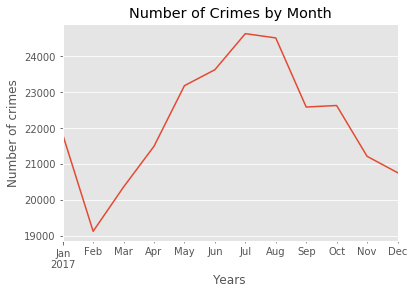

In [17]:
# plot numbers of crimes by month
crime.resample('M').size().plot()

# define the title and the labels
plt.title('Number of Crimes by Month')
plt.xlabel('Years')
plt.ylabel('Number of crimes')

plt.show()

#### 3.1.2 Total number by day
Visualise the crimes stats on a daily basis. Most of the daily crime counts in 2017 fluctuated between 500 and 900.

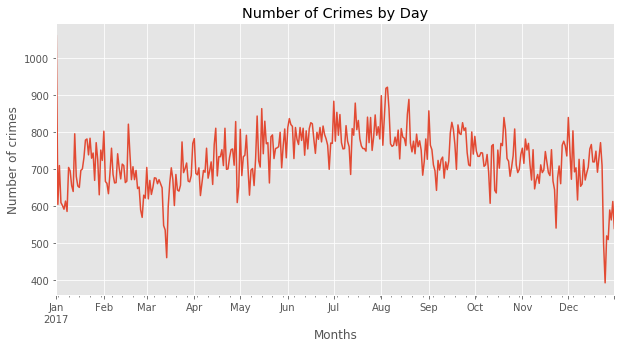

In [18]:
# set figure size
plt.figure(figsize=(10,5))

# plot numbers of crimes data by day 
crime.resample('D').size().plot()

# define the title and the labels
plt.title('Number of Crimes by Day')
plt.xlabel('Months')
plt.ylabel('Number of crimes')

plt.show()

#### 3.1.3 Total number by weekday
The bar graph below depicts the number of crime occurrence on weekday, where Friday has the largest number while Wednesday has the least. In general, crimes appear to be evenly distributed across days of the week.

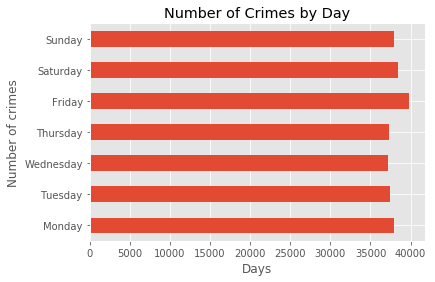

In [19]:
# plot numbers of crimes data by weekday
crime.groupby('Weekday').size().plot(kind = 'barh')

# define the title and the labels
plt.title('Number of Crimes by Day')
plt.xlabel('Days')
plt.ylabel('Number of crimes')
import calendar
plt.yticks(np.arange(7), calendar.day_name)
plt.show()

#### 3.1.4 Total number by hour
The graph suggests the crime occurrence trendency by hour. Surprisingly, we find the count of incidents reached a peak at noon. 

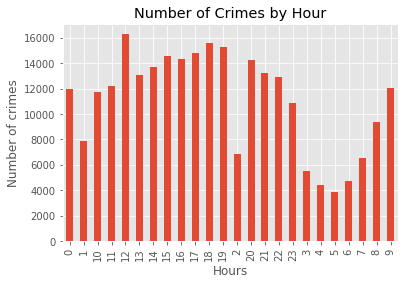

In [20]:
# plot numbers of crimes data by hour
crime.groupby('Hour').size().plot(kind = 'bar')

# define the title and the labels
plt.title('Number of Crimes by Hour')
plt.xlabel('Hours')
plt.ylabel('Number of crimes')
plt.show()

#### 3.1.5 Total number by Day/Night
Apparently, more crimes occurred during the day rather than at night.

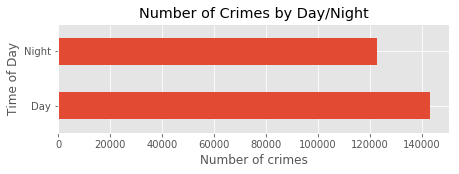

In [21]:
# set figure size
plt.figure(figsize=(7,2))

# plot numbers of crimes data by day/night
crime.groupby('TimeOfDay').size().plot(kind = 'barh')

# define the title and the labels
plt.title('Number of Crimes by Day/Night')
plt.xlabel('Number of crimes')
plt.ylabel('Time of Day')
plt.show()

#### 3.1.6 Total number by Chicago Sides
The graph below demonstrates that the south side is the most dangerous area in Chicago with a total of more than 120,000 crimes committed in 2017, which is significantly more than the other 3 sides.

In [22]:
# get crime counts group by primary type sorting in descending order 
Sides_counts= pd.DataFrame(crime.groupby('CommunityArea').size().sort_values(ascending=False).rename('Counts').reset_index())

# show the first 10 rows 
Sides_counts

,CommunityArea,Counts
0,South Side,117528
1,West Side,66714
2,North Side,57075
3,Central,24630


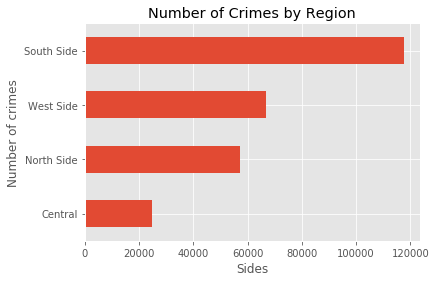

In [23]:
# plot numbers of crimes by Sides
crime.groupby('CommunityArea').size().sort_values().plot(kind = 'barh')

# define the title and the labels
plt.title('Number of Crimes by Region')
plt.xlabel('Sides')
plt.ylabel('Number of crimes')

plt.show()

#### 3.1.7 Total number by crime type
There are totally 32 primary types. The most common type of crimes is 'Theft', followed by 'Battery', 'Criminal Damage' and 'Assualt'. 

In [24]:
# get crime counts group by primary type sorting in descending order 
Type_counts= pd.DataFrame(df.groupby('Primary Type').size().sort_values(ascending=False).rename('Counts').reset_index())

# show the first 10 rows 
Type_counts.head(10)

,Primary Type,Counts
0,THEFT,64193
1,BATTERY,49199
2,CRIMINAL DAMAGE,29027
3,ASSAULT,19283
4,DECEPTIVE PRACTICE,18334
5,OTHER OFFENSE,17116
6,BURGLARY,12981
7,ROBBERY,11882
8,NARCOTICS,11567
9,MOTOR VEHICLE THEFT,11423


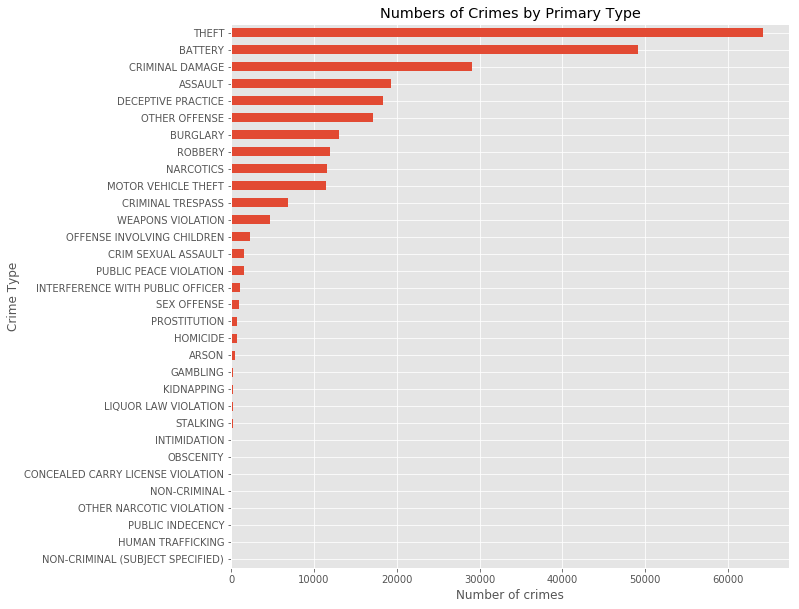

In [25]:
# set figure size
plt.figure(figsize=(10,10))

# get crime counts by primary type and sort it ascending, plot the figure
df.groupby('Primary Type').size().sort_values(ascending = True).plot(kind = 'barh')

# define the title and the labels
plt.title('Numbers of Crimes by Primary Type')
plt.ylabel('Crime Type')
plt.xlabel('Number of crimes')

plt.show()

#### 3.1.8 Total number by location
The table and graph below present the most usual places where a crime took place. With 128 locations listed, here we display the top ten. The maximum numbers of crimes occurred on streets, followed by residences, apartments and sidewalks. 

In [26]:
# get crime counts group by location sorting in descending order 
Location_counts= pd.DataFrame(crime.groupby('Location').size().sort_values(ascending=False).rename('Counts').reset_index())

# show the first 10 rows 
Location_counts.head(10)

,Location,Counts
0,STREET,59979
1,RESIDENCE,45302
2,APARTMENT,33225
3,SIDEWALK,20996
4,OTHER,11169
5,PARKING LOT/GARAGE(NON.RESID.),8242
6,RESTAURANT,6879
7,SMALL RETAIL STORE,6824
8,RESIDENTIAL YARD (FRONT/BACK),5301
9,ALLEY,5280


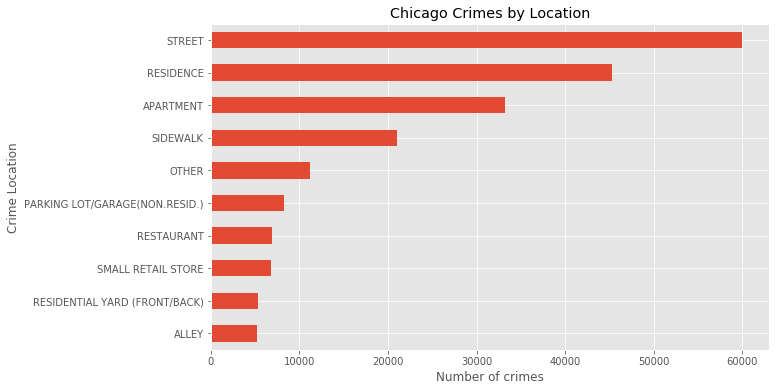

In [27]:
# set figure size
plt.figure(figsize=(10,6))

crime.groupby('Location').size().sort_values(ascending = True)[-10:].plot(kind = 'barh')

# define the title and the labels
plt.title('Chicago Crimes by Location')
plt.ylabel('Crime Location')
plt.xlabel('Number of crimes')

plt.show()

### 3.2 Analysis of Arrest
#### 3.2.1 Arrest by month
The following graph presents the monthly distribution taking both the number of crime and arrest rate into consideration. The arrest numbers were also influenced by seasonal change.

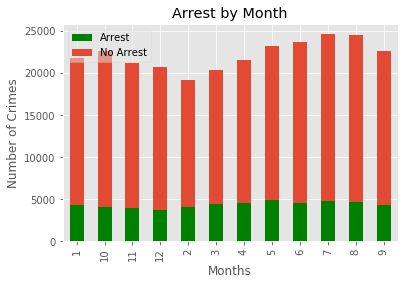

In [28]:
# calculate counts of arrest and non-arrest by month
arrest_true = crime[crime['Arrest'] == True].groupby('Month')['Arrest'].count()
arrest_false = crime[crime['Arrest'] == False].groupby('Month')['Arrest'].count()

# plot arrest data in a stacked bar chart
arrest_true.plot(kind = 'bar', color = 'g')
arrest_false.plot(kind = 'bar', bottom = arrest_true)

# define the title and the labels
plt.title('Arrest by Month')
plt.xlabel('Months')
plt.ylabel('Number of Crimes')
plt.legend(labels = ['Arrest', 'No Arrest'], framealpha=0.5)

#### 3.2.2 Arrest by crime type
The chart below indicates that there is obviously a relationship between crime types and arrest rate.

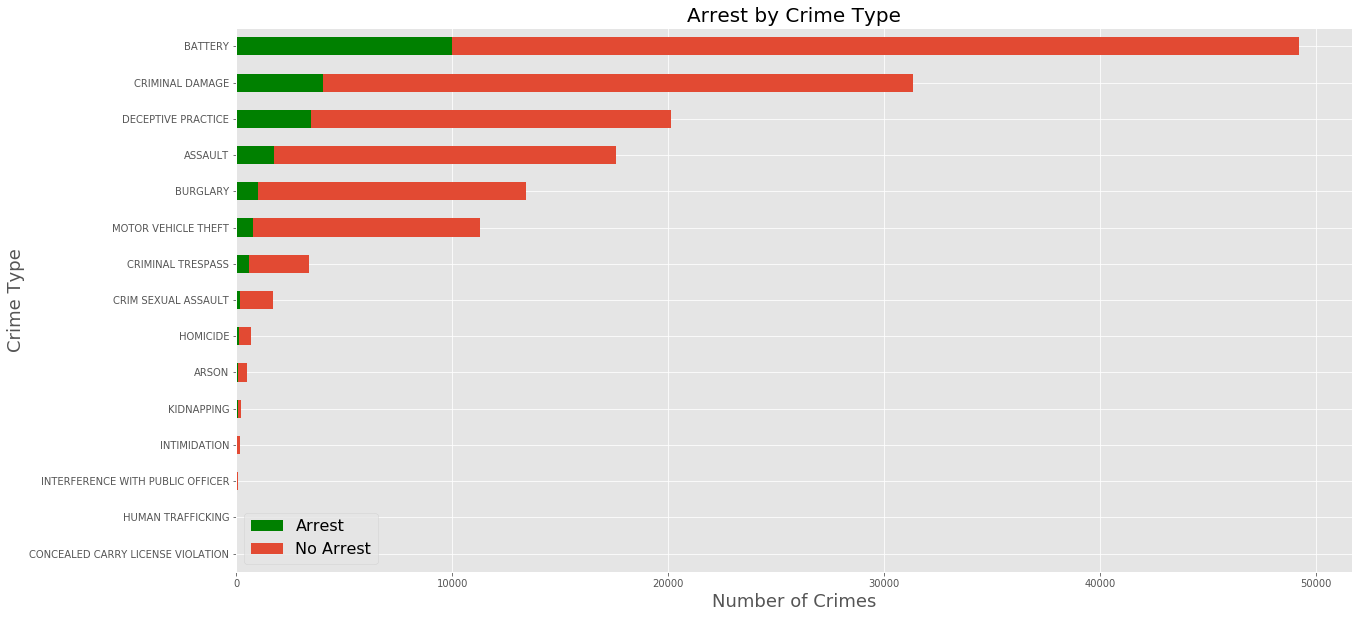

In [29]:
# set figure size
plt.figure(figsize=(20,10))

# get arrest counts for each primary crime type
arrest_true_type = crime[crime['Arrest'] == True].groupby('PrimaryType')['Arrest'].size().head(15).sort_values(ascending=True)
arrest_false_type = crime[crime['Arrest'] == False].groupby('PrimaryType')['Arrest'].size().head(15).sort_values(ascending=True)

# plot arrest data in a stacked bar chart
arrest_true_type.plot(kind = 'barh', color = 'g')
arrest_false_type.plot(kind = 'barh', left = arrest_true_type)

# define the title and the labels
plt.title('Arrest by Crime Type', fontsize = 20)
plt.xlabel('Number of Crimes', fontsize = 18)
plt.ylabel('Crime Type', fontsize = 18)
plt.legend(labels = ['Arrest', 'No Arrest'], fontsize = 16)

#### 3.2.3 Arrest by location
The figure suggests the location where crimes took place are also considered to be related to the arrest rate.

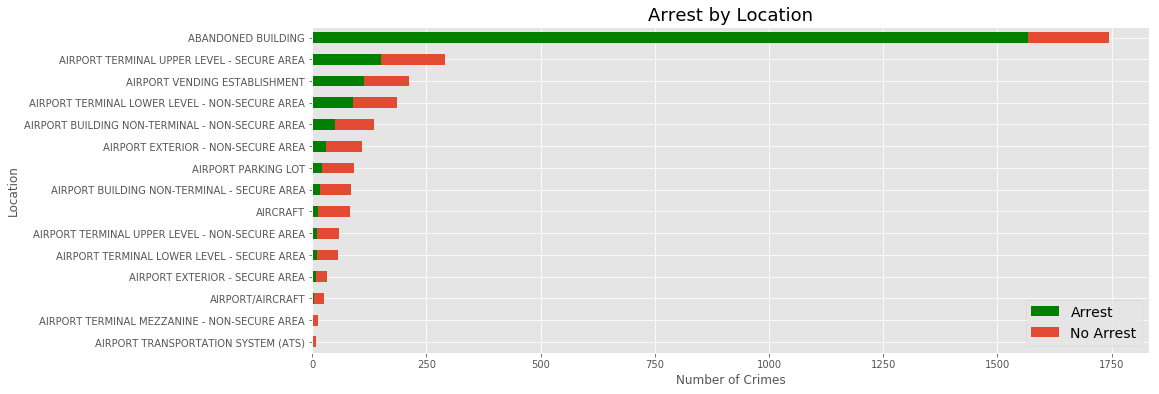

In [30]:
# set figure size
plt.figure(figsize=(15,6))

# get arrest counts at each location
arrest_true_location = crime[crime['Arrest'] == True].groupby('Location')['Arrest'].size().head(15).sort_values(ascending=True)
arrest_false_location = crime[crime['Arrest'] == False].groupby('Location')['Arrest'].size().head(15).sort_values(ascending=True)

# plot arrest data in a stacked bar chart
arrest_true_location.plot(kind = 'barh', color = 'g')
arrest_false_location.plot(kind = 'barh', left = arrest_true_location)

# define the title and the labels
plt.title('Arrest by Location', fontsize = 18)
plt.xlabel('Number of Crimes')
plt.ylabel('Location')
plt.legend(labels = ['Arrest', 'No Arrest'], fontsize = 14)

### 3.3 Analysis of Crime Type
Have a look at the monthly trend by crime type. Apparently, not all types of crime exist a consistency with the seasonal trends of occurrence. For example, the number of theft varied with season, while no clear trend of seasonal change can be identified in deceptive practice. 

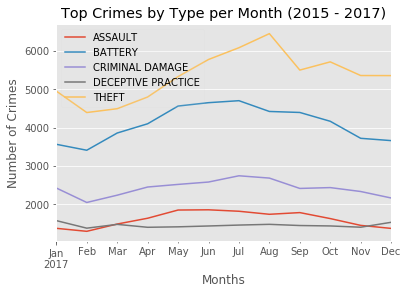

In [31]:
# get top crimes stats using isin()
crime_top = pd.DataFrame(crime[crime['PrimaryType'].isin(['THEFT', 'BATTERY', 'CRIMINAL DAMAGE', 'ASSAULT', 'DECEPTIVE PRACTICE'])]['PrimaryType'])

# group top crimes by month and crime type
crime_top_month = crime_top.groupby([pd.TimeGrouper('M'), 'PrimaryType'])
crime_top_data = crime_top_month.PrimaryType.count()

# unstack top crimes type group for series plotting
crime_top_data = crime_top_data.unstack()

# plot top crimes data by month
crime_top_data.plot()

# define the title and the labels
plt.title('Top Crimes by Type per Month (2015 - 2017)')
plt.xlabel('Months')
plt.ylabel('Number of Crimes')
plt.legend(loc='best', fancybox=True, framealpha=0.1)

## 4 Data Classification
In this section, we intend to employ machine learning techniques to explore the problems of classifying and predicting
crimes in Chicago based on the information presented in the dataset.

**Import the libaries *scikit-learn* for classification** 

In [32]:
# import packages for classification 
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction import DictVectorizer
from sklearn.cross_validation import train_test_split
from sklearn.grid_search import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

C:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


### 4.1 Predict Arrest
The first task is to predict whether an arrest is to be made for a reported crime. 
### 4.1.1 Data Pre-processing
#### 4.1.1.1 Organise and clean the dataset

Currently there are 32 crime categories in total. From the graph in the last chapter we can find that some of the crime types bear some similarities, which means they can be combined together. For example, ASSAULT and INTIMIDATION coulde be classified as a similar type. After going through all the 32 types in the table, we are able to reduce it down to 20 categories. The aim of this move is to reduce the categorical dimensions in order to deliver better prediction results and enhance efficiency.

In [33]:
# replace the 32 types with the new 20 categories 
crime_predict = crime.replace(['THEFT', 'BURGLARY', 'MOTOR VEHICLE THEFT', 'ROBBERY', 'BATTERY', 'CRIM SEXUAL ASSAULT',
                       'SEX OFFENSE', 'NARCOTICS', 'OTHER NARCOTIC VIOLATION' , 'ASSAULT', 'INTIMIDATION',
                       'OTHER OFFENSE', 'DECEPTIVE PRACTICE', 'CRIMINAL TRESPASS', 'WEAPONS VIOLATION', 
                       'CONCEALED CARRY LICENSE VIOLATION', 'PUBLIC INDECENCY', 'PUBLIC PEACE VIOLATION',
                       'OFFENSE INVOLVING CHILDREN', 'PROSTITUTION', 'INTERFERENCE WITH PUBLIC OFFICER', 'HOMICIDE',
                       'ARSON', 'CRIMINAL DAMAGE', 'GAMBLING', 'LIQUOR LAW VIOLATION', 'KIDNAPPING', 'STALKING', 
                       'OBSCENITY', 'NON - CRIMINAL', 'NON-CRIMINAL', 'NON-CRIMINAL (SUBJECT SPECIFIED)', 'HUMAN TRAFFICKING'],
                       [1,1,1,1,2,2,2,3,3,4,4,5,6,7,8,8,9,9,10,11,12,13,14,14,15,16,17,18,18,19,19,19,20])

Create our attribute dataset called `Arrest_attribute` which includes all attributes from `crime0` except the target attribute `'Arrest'` and three attributes (`Domestic, Day, Hour`) which are considered not of much help in predicting arrest. **Drop these columns and create a new dataframe `crime0`.** Check the contents of the new dataframe. We will use 6 variables - **`PrimaryType, Location, CommunityArea, Month, Weekday, TimeOfDay`** to predict arrest in Chicago.

In [34]:
# drop columns
arrest_attribute = crime_predict.drop(['Arrest', 'Domestic', 'Day', 'Hour'], axis = 1)

# check the first few rows of the dataframe
arrest_attribute.head(3)

,PrimaryType,Location,CommunityArea,Month,Weekday,TimeOfDay
Date,,,,,,
2017-09-21 00:15:00,6,CURRENCY EXCHANGE,North Side,9,3,Night
2017-10-12 19:14:00,14,JAIL / LOCK-UP FACILITY,North Side,10,3,Night
2017-10-30 11:52:00,5,APARTMENT,South Side,10,0,Day


**Use `LabelEncoder` from the `scikit` library to convert categorical features to the format required for the classifier. **

In [35]:
# create the LabelEncoder object
le = LabelEncoder() 

# run LabelEncoder on the Arrest column
labels_arrest = le.fit_transform(crime_predict['Arrest']) 

Let's continue handling categorical features. First, **Create an array of dictionaries for `arrest_attribute` data.**

In [36]:
#convert attribute data to an array of dictionaries
arrest_dict = arrest_attribute.to_dict('records')

# check the first item
arrest_dict[0]

{'CommunityArea': 'North Side',
 'Location': 'CURRENCY EXCHANGE',
 'Month': '9',
 'PrimaryType': 6,
 'TimeOfDay': 'Night',
 'Weekday': '3'}

Employ `DictVectorizer` to convert categorical attributes into the boolean columns representing each category. **Execute the `DictVectorizer` to extract the matrix and then convert it to an array for the training process.**

In [37]:
# create the DictVectorizer object
vec = DictVectorizer()  

# execute process on the record dictionaries
vec_arrest = vec.fit_transform(arrest_dict)

# covert matrix to array
vec_arrest_array = vec_arrest.toarray() 

#### 4.1.1.2 Split training and testing sets
**Apply `train_test_split` tool from `scikit` to randomly split the attribute and label data into training and testing sets.** 

In [38]:
train_d_a, test_d_a, train_lab_a, test_lab_a = train_test_split(vec_arrest_array, labels_arrest)

print('There are a total of ' + str(len(train_d_a)) + ' samples in the training dataset and ' 
      + str(len(test_d_a)) + ' samples in the testing dataset.')

There are a total of 199460 samples in the training dataset and 66487 samples in the testing dataset.


### 4.1.2 Model Development
The next step is to refine the model through hyperparameter optimisation and cross-validation<sup>[8]</sup>. Use **`GridSearchCV`** method output the best parameter combinations within a range we provide, calculated using cross-validation. For the prediction model, we will employ two classifiers - **Decision Tree** and **Random Forest** for predicting arrest and compare their performance based on the results. 
### 4.1.2.1 Decision Tree


**Create the `GridSearchCV` function according to the parameter settings.**

In [39]:
# define the parameter values that should be searched
parameters_dt = {'max_depth': [7, 8, 9, 10, 11]}

# initiate and fit the grid
grid_search_dt = GridSearchCV(DecisionTreeClassifier(), parameters_dt, cv=5, scoring='accuracy')

In [40]:
grid_search_dt.fit(train_d_a,train_lab_a)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': [7, 8, 9, 10, 11]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

**Check the settings using the `grid_scores_` function. Test the model with the best parameters.**

In [41]:
# view the complete results of parameters
grid_search_dt.grid_scores_

[mean: 0.87721, std: 0.00076, params: {'max_depth': 7},
 mean: 0.87937, std: 0.00127, params: {'max_depth': 8},
 mean: 0.87956, std: 0.00087, params: {'max_depth': 9},
 mean: 0.87941, std: 0.00098, params: {'max_depth': 10},
 mean: 0.87961, std: 0.00082, params: {'max_depth': 11}]

In [42]:
# examine the best model and print accuracy score
dt_score = grid_search_dt.score(test_d_a, test_lab_a)
print(grid_search_dt.best_params_)
print(dt_score)

{'max_depth': 11}
0.881285063245


<font color=blue>We achieved a accuracy rate of **0.88** using the best-known parameter set {'max_depth': 11}. </font>

**Examine time spent on executing `.fit()`.**

In [43]:
%%time

# creates the DT classifier
dt = DecisionTreeClassifier(max_depth=11)  

# executes the classifier on the training dataset
dt.fit(train_d_a, train_lab_a) 

Wall time: 6.47 s


<font color=blue>It took **6.47 seconds** to execute the .fit() function of Decision Tree classifier.</font>

**Apply `.predict()` to make predictions** for the test data using the best parameter combination, then **run a classification report** and **create a confusion matrix** to furtherly examine the model performance.

In [44]:
predictions_arrest_dt = grid_search_dt.predict(test_d_a)

In [45]:
print(metrics.classification_report(test_lab_a, predictions_arrest_dt))

             precision    recall  f1-score   support

          0       0.89      0.97      0.93     53515
          1       0.82      0.50      0.62     12972

avg / total       0.88      0.88      0.87     66487



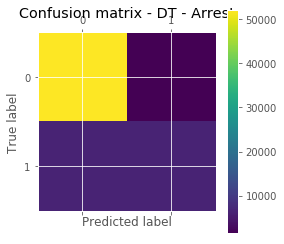

In [46]:
confusion_matrix_arrest_dt = metrics.confusion_matrix(test_lab_a, predictions_arrest_dt)

plt.matshow(confusion_matrix_arrest_dt)
plt.title('Confusion matrix - DT - Arrest')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

<font color=blue>The report and confusion matrix lead to detailed information on how the classifier perform on the prediction task.  The low recall score (0.5) indicates that the classifier didn't performed very well on identifying the crimes that no arrest will be made.  </font>

### 4.1.2.2 Random Forest Classifer
Let's carry out the same procedure utilising Random Forest Classifier. **Create the `GridSearchCV` function according to the parameter settings.**

In [47]:
# define the parameter values that should be searched
parameters_rf = {'n_estimators': [60, 70, 80], 'max_depth':[10, 20, 30]}

# initiate and fit the grid
grid_search_rf = GridSearchCV(RandomForestClassifier(), parameters_rf, cv=5, scoring='accuracy')

In [48]:
grid_search_rf.fit(train_d_a,train_lab_a)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [60, 70, 80], 'max_depth': [10, 20, 30]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

**Check the settings using the `grid_scores_` function. Test the model with the best parameters.**

In [49]:
# view the complete results 
grid_search_rf.grid_scores_ 

[mean: 0.81395, std: 0.00224, params: {'max_depth': 10, 'n_estimators': 60},
 mean: 0.81375, std: 0.00189, params: {'max_depth': 10, 'n_estimators': 70},
 mean: 0.81072, std: 0.00348, params: {'max_depth': 10, 'n_estimators': 80},
 mean: 0.83984, std: 0.00151, params: {'max_depth': 20, 'n_estimators': 60},
 mean: 0.84178, std: 0.00338, params: {'max_depth': 20, 'n_estimators': 70},
 mean: 0.84099, std: 0.00228, params: {'max_depth': 20, 'n_estimators': 80},
 mean: 0.86080, std: 0.00075, params: {'max_depth': 30, 'n_estimators': 60},
 mean: 0.86141, std: 0.00122, params: {'max_depth': 30, 'n_estimators': 70},
 mean: 0.86148, std: 0.00110, params: {'max_depth': 30, 'n_estimators': 80}]

In [50]:
# examine the best model and print accuracy score
rf_score = grid_search_rf.score(test_d_a, test_lab_a)
print(grid_search_rf.best_params_)
print(rf_score)

{'max_depth': 30, 'n_estimators': 80}
0.863206341089


<font color=blue>We achieved a accuracy rate of **0.86** using the best-known parameter set {'max_depth': 30, 'n_estimators': 80}. </font>

**Examine time spent on executing `.fit()`.**

In [51]:
%%time

# creates the RF classifier
rf = RandomForestClassifier(n_estimators=80, max_depth=30) 

# executes the classifier on the training dataset
rf.fit(train_d_a, train_lab_a) 

Wall time: 1min 19s


<font color=blue>It took **1 minute 19 seconds** to execute the .fit() function of Random Forest Classifier.</font>

**Apply `.predict()` to make predictions** for the test data using the best parameter combination, then **run a classification report** and **create a confusion matrix** to furtherly examine the model performance.

In [52]:
predictions_arrest_rf = grid_search_rf.predict(test_d_a)

In [53]:
print(metrics.classification_report(test_lab_a, predictions_arrest_rf))

             precision    recall  f1-score   support

          0       0.87      0.98      0.92     53515
          1       0.81      0.39      0.53     12972

avg / total       0.86      0.86      0.84     66487



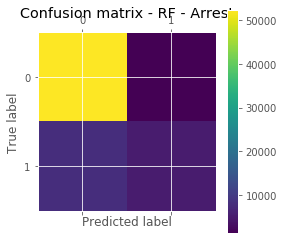

In [54]:
confusion_matrix_arrest_rf = metrics.confusion_matrix(test_lab_a, predictions_arrest_rf)

plt.matshow(confusion_matrix_arrest_rf)
plt.title('Confusion matrix - RF - Arrest')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

<font color=blue>The report and confusion matrix suggest similar interpretation with the last one using DT. With a recall score  of 0.39, the Random Forest Classifier provided an even poorer performance on identifying crimes that no arrest will be made.  </font>

### 4.1.3 Evaluation
For predicting the arrest probablity, it turns out that Decision Tree Classifier delivered a better performance than Random Forest Classifier in terms of both the accuracy rate and the speed. 

### 4.2 Predict Crime Type
Our second task is predicting crime categories in Chicago using machine learning techniques.  
### 4.2.1 Data Pre-processing
#### 4.2.1.1 Organise and clean the dataset

In [55]:
# drop columns
type_attribute = crime_predict.drop(['PrimaryType', 'Day'], axis = 1)

# check the first few rows of the dataframe
type_attribute.head(3)

,Location,Arrest,Domestic,CommunityArea,Month,Weekday,Hour,TimeOfDay
Date,,,,,,,,
2017-09-21 00:15:00,CURRENCY EXCHANGE,True,False,North Side,9,3,0,Night
2017-10-12 19:14:00,JAIL / LOCK-UP FACILITY,True,False,North Side,10,3,19,Night
2017-10-30 11:52:00,APARTMENT,True,False,South Side,10,0,11,Day


**Use the `LabelEncoder` we created in last task to convert categorical features to the format required for the classifier. **

In [56]:
# runs LabelEncoder on the PrimaryType column
labels_type = le.fit_transform(crime_predict['PrimaryType'])

**Create an array of dictionaries for `type_attribute` data.**

In [57]:
#convert attribute data to an array of dictionaries
type_dict = type_attribute.to_dict('records')

# check the first item
type_dict[0]

{'Arrest': True,
 'CommunityArea': 'North Side',
 'Domestic': False,
 'Hour': '0',
 'Location': 'CURRENCY EXCHANGE',
 'Month': '9',
 'TimeOfDay': 'Night',
 'Weekday': '3'}

**Execute the `DictVectorizer` to extract the matrix and then convert it to an array for the training process.**

In [58]:
# execute process on the record dictionaries
vec_type = vec.fit_transform(type_dict)  

# convert matrix to array
vec_type_array = vec_type.toarray() 

#### 4.2.1.2 Split training and testing sets
**Apply `train_test_split` tool from `scikit` to randomly split the attribute and label data into training and testing sets.** 

In [59]:
train_d_t, test_d_t, train_lab_t, test_lab_t = train_test_split(vec_type_array, labels_type)

print('There are a total of ' + str(len(train_d_t)) + ' samples in the training dataset and ' 
      + str(len(test_d_t)) + ' samples in the testing dataset.')

There are a total of 199460 samples in the training dataset and 66487 samples in the testing dataset.


### 4.2.2 Model Development
The process is similar to what we applied to predicting arrest. We will still use **`Decision Tree`**and **`Random Forest`** for the crime category prediction process.
### 4.2.2.1 Decision Tree
Since we have already set the parameters for `GridSearchCV` in the last task, we should simply **apply the `.fit()` funtion**.

In [60]:
grid_search_dt.fit(train_d_t,train_lab_t)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': [7, 8, 9, 10, 11]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

**Check the settings using the `grid_scores_` function. Test the model with the best parameters.**

In [61]:
# view the complete results
grid_search_dt.grid_scores_

[mean: 0.49278, std: 0.00144, params: {'max_depth': 7},
 mean: 0.49488, std: 0.00094, params: {'max_depth': 8},
 mean: 0.49730, std: 0.00043, params: {'max_depth': 9},
 mean: 0.49878, std: 0.00088, params: {'max_depth': 10},
 mean: 0.49872, std: 0.00083, params: {'max_depth': 11}]

In [62]:
# examine the best model and print accuracy score
dt_score = grid_search_dt.score(test_d_t, test_lab_t)
print(grid_search_dt.best_params_)
print(dt_score)

{'max_depth': 10}
0.499676628514


<font color=blue>We achieved a accuracy rate of nearly **0.5** using the best-known parameter set {'max_depth': 10}. </font>

**Examine time spent on executing `.fit()`.**

In [63]:
%%time

# creates the DT classifier
dt = DecisionTreeClassifier(max_depth = 9, min_samples_split = 2)  

# executes the classifier on the training dataset
dt.fit(train_d_t, train_lab_t) 

Wall time: 7.35 s


<font color=blue>It took **7.35 seconds** to execute the .fit() function of Decision Tree Classifier.</font>

### 4.2.2.2 Random Forest Classifer
**Apply the `.fit()` funtion**.

In [64]:
grid_search_rf.fit(train_d_t,train_lab_t)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [60, 70, 80], 'max_depth': [10, 20, 30]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

**Check the settings using the `grid_scores_` function. Test the model with the best parameters.**

In [65]:
# view the complete results
grid_search_rf.grid_scores_

[mean: 0.47144, std: 0.00062, params: {'max_depth': 10, 'n_estimators': 60},
 mean: 0.47203, std: 0.00172, params: {'max_depth': 10, 'n_estimators': 70},
 mean: 0.47157, std: 0.00129, params: {'max_depth': 10, 'n_estimators': 80},
 mean: 0.50342, std: 0.00152, params: {'max_depth': 20, 'n_estimators': 60},
 mean: 0.50338, std: 0.00099, params: {'max_depth': 20, 'n_estimators': 70},
 mean: 0.50346, std: 0.00123, params: {'max_depth': 20, 'n_estimators': 80},
 mean: 0.48412, std: 0.00213, params: {'max_depth': 30, 'n_estimators': 60},
 mean: 0.48372, std: 0.00168, params: {'max_depth': 30, 'n_estimators': 70},
 mean: 0.48546, std: 0.00125, params: {'max_depth': 30, 'n_estimators': 80}]

In [66]:
# examine the best model and print accuracy score
rf_score = grid_search_rf.score(test_d_t, test_lab_t)
print(grid_search_rf.best_params_)
print(rf_score)

{'max_depth': 20, 'n_estimators': 80}
0.503361559403


<font color=blue>We achieved a accuracy rate of **0.5** using the best-known parameter set {'max_depth': 20, 'n_estimators': 80}. </font>

**Examine time spent on executing `.fit()`.**

In [67]:
%%time

# creates the RF classifier
rf = RandomForestClassifier(n_estimators=70, max_depth=20) 

# executes the classifier on the training dataset
rf.fit(train_d_t, train_lab_t) 

Wall time: 1min 1s


<font color=blue>It took **1 minute 1 seconds** to execute the .fit() function of Random Forest Classifier.</font>

### 4.2.3 Evaluation
Decision Tree still runs greatly faster than Random Forest Classifier. However, our results across all the reduced 20 crime categories demonstrate the difficulty of the fully-specified crime classification problem with both two classifiers achieving a low accuracy of around 50%. 

## 5 Conclusion
In this project, we made an exploration and obtained insights of the Chicago crime data in 2017 using data mining techniques. The data analysis and visualisation reveal some interesting pattern and trends. For instance, 12pm can be considered to be the most dangerous time during a day. As for the prediction tasks, we found Decision Tree performs better than Random Forest for predicting arrests. However, both of them didn't yield convincing results of crime category classification. We could improve the feature selection for potential improvement on the model. Also, other algorithms and techniques can be employed to generate better models for crime classification prediction.

## References
* [1] Kohtz, S.J., He, L., Al Najjar, W.A. and Alghoul, T.M., 2017. *Crime Patterns in Chicago Using Agent Based Modeling*. In IIE Annual Conference. Proceedings (pp. 964-969). Institute of Industrial and Systems Engineers (IISE).
* [2] Chicago Police Department, 2018. Crimes -2011 to present. [online] Available at: < https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-present/ijzp-q8t2/data> [Accessed 15 April 2018].
* [3] Wikipedia, 2018. Community Areas in Chicago. [online] Available at: < https://en.wikipedia.org/wiki/Community_areas_in_Chicago > [Accessed 20 April 2018].
* [4] Abouelnaga, Y., 2016. *San Francisco Crime Classification*. arXiv preprint arXiv:1607.03626.
* [5] Cherian, J. and Dawson, M., 2015. RoboCop: Crime Classification and Prediction in San Francisco. Forest, 15, pp.70-69.
* [6] Workshop 4 - Data Munging
* [7] Workshop 7 - Classification
* [8] Workshop 8 - Analysis Workflow

